In [323]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Load the Data

In [324]:
df = pd.read_csv("data.csv")


In [325]:
df.shape

(9894, 19)

In [326]:
df.head()

,id,team,name,position,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,position_grouped,minutes_played_median
0,1,Manchester United,Jack Butland,Goalkeeper,30.0,15,0.000000,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,Goalkeeper,1304.0
1,2,Manchester United,Tom Heaton,Goalkeeper,37.0,4,0.000000,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,Goalkeeper,292.0
2,5,Manchester United,Harry Maguire,Defender Centre-Back,30.0,68,0.037799,0.000000,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,Defender Centre-Back,4762.0
3,6,Manchester United,Victor Lindelöf,Defender Centre-Back,28.0,70,0.000000,0.032901,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,Defender Centre-Back,5471.0
4,8,Manchester United,Teden Mengi,Defender Centre-Back,21.0,34,0.000000,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,Defender Centre-Back,2758.0


## Preprocess the Data

In [327]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

df.drop(['id'], axis=1, inplace=True)

In [328]:
# Completeness
df.isnull().sum()

team                     0
name                     0
position                 0
age                      0
appearance               0
goals                    0
assists                  0
goals conceded           0
clean sheets             0
minutes played           0
days_injured             0
games_injured            0
award                    0
current_value            0
highest_value            0
position_encoded         0
position_grouped         0
minutes_played_median    0
dtype: int64

In [329]:
# Accurecy types
df.dtypes

team                      object
name                      object
position                  object
age                      float64
appearance                 int64
goals                    float64
assists                  float64
goals conceded           float64
clean sheets             float64
minutes played             int64
days_injured               int64
games_injured              int64
award                      int64
current_value              int64
highest_value              int64
position_encoded           int64
position_grouped          object
minutes_played_median    float64
dtype: object

In [330]:

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['age', 'goals', 'assists', 'goals conceded', 'minutes_played_median']

In [331]:
for i in categorical_features:
    print(df[i].value_counts())

team
Daejeon Hana Citizen      44
FC Seoul                  43
Jeonbuk Hyundai Motors    43
Daegu FC                  42
Gangwon FC                42
                          ..
Manchester City            6
FC Barcelona               6
Gaziantep FK               6
Real Madrid                5
Bayern Munich              5
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1688
Attack Centre-Forward         1194
Goalkeeper                    1172
midfield-CentralMidfield      1060
midfield-DefensiveMidfield     835
Defender Right-Back            812
Defender Left-Back             762
midfield-AttackingMidfield     685
Attack-RightWinger             652
Attack-LeftWinger              635
midfield-LeftMidfield           97
midfield-RightMidfield          95
midfield                        71
Attack-SecondStriker            54
Attack                          49
Defender                        33
Name: count, dtype: int64


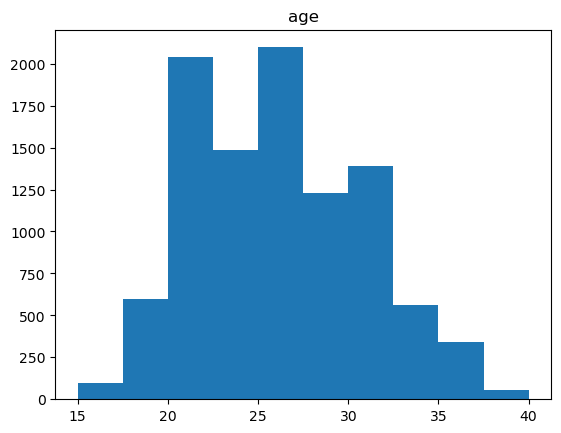

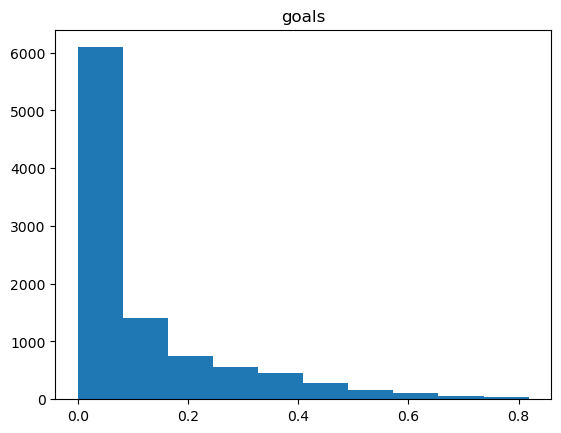

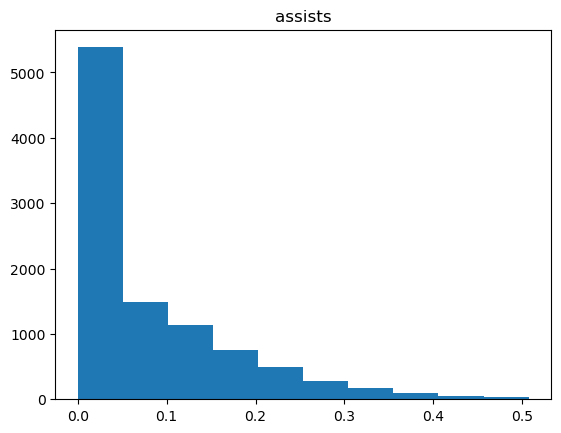

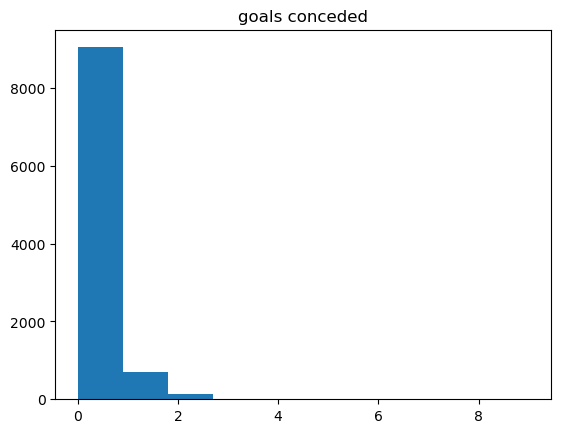

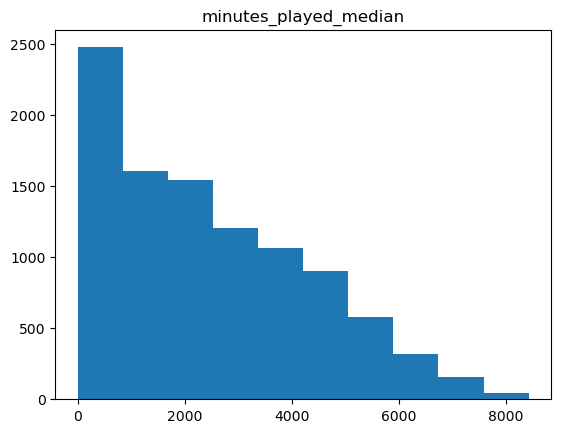

In [332]:
for i in numeric_features:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

## Feature selection

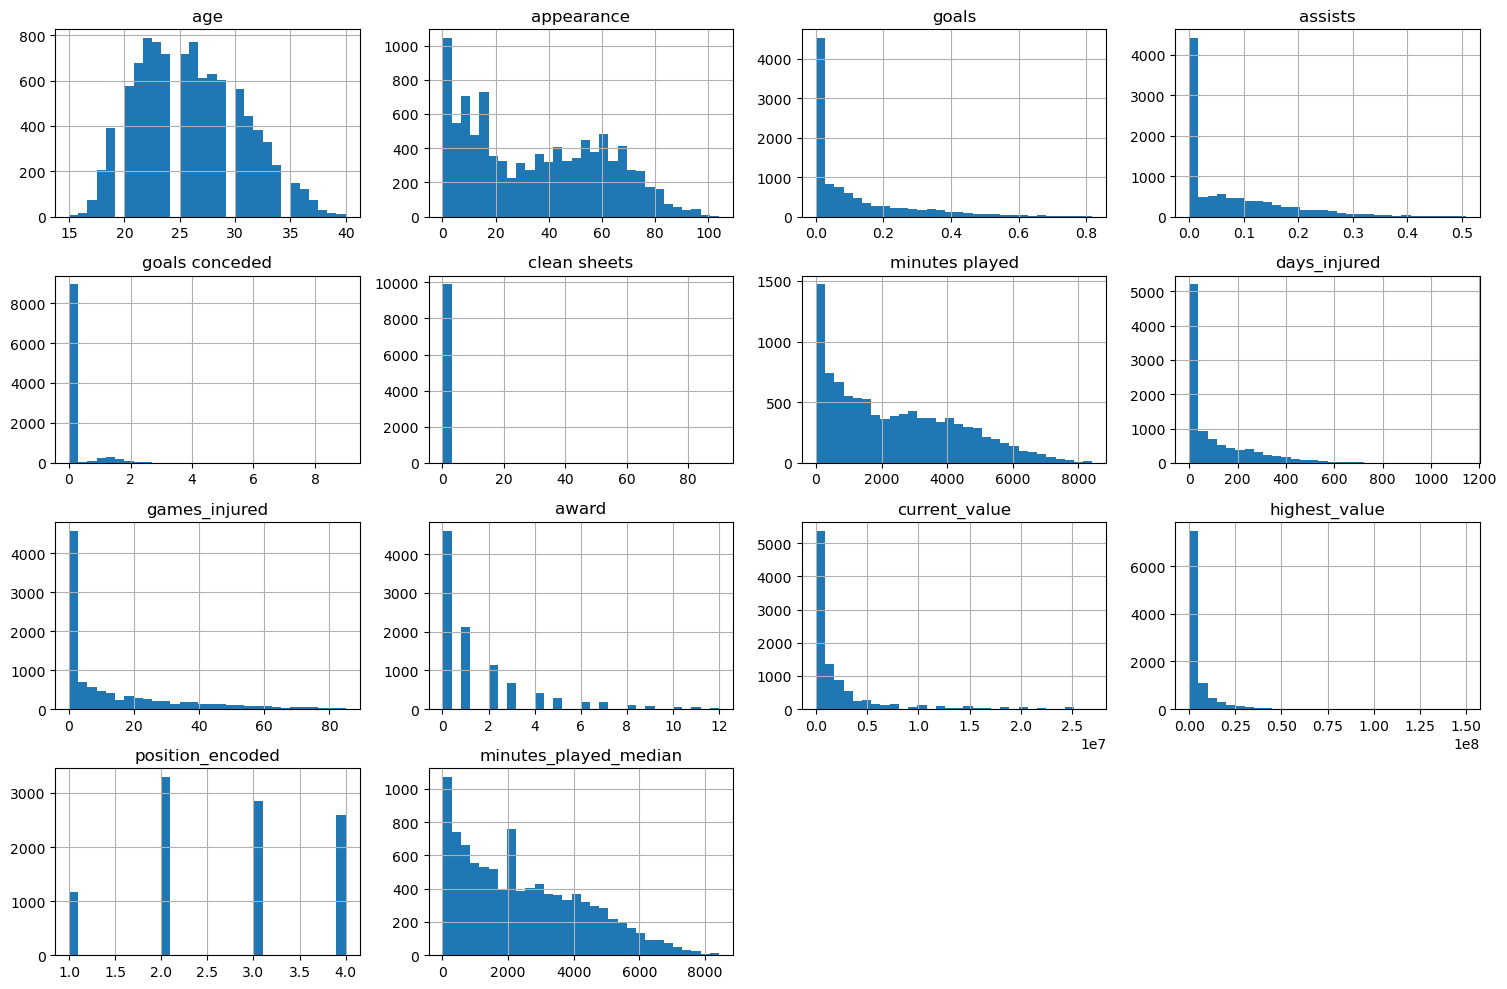

In [333]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [334]:
numeric_columns = ['age', 'goals', 'assists', 'minutes played', 'minutes_played_median', 'current_value']
correlation = df[numeric_columns].corr()
print(correlation)

                            age     goals   assists  minutes played  \
age                    1.000000 -0.021119 -0.008580        0.175605   
goals                 -0.021119  1.000000  0.430883        0.139766   
assists               -0.008580  0.430883  1.000000        0.198071   
minutes played         0.175605  0.139766  0.198071        1.000000   
minutes_played_median  0.158660  0.110482  0.167353        0.973819   
current_value         -0.048783  0.176738  0.210882        0.437680   

                       minutes_played_median  current_value  
age                                 0.158660      -0.048783  
goals                               0.110482       0.176738  
assists                             0.167353       0.210882  
minutes played                      0.973819       0.437680  
minutes_played_median               1.000000       0.427823  
current_value                       0.427823       1.000000  


In [335]:
selected_features = ['goals', 'assists', 'minutes played']

# linearRegresion

In [336]:
X = df[selected_features]
y = df['current_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Prediction:', y_pred)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Prediction: [ 757775.41276417 1264435.65170656 4279095.05207849 ... 1588179.20267484
  129187.9383535   757775.41276417]
Mean Squared Error: 15601359748657.514
R2 Score: 0.20432353219622068
Mean Absolute Error: 2368601.4711389663


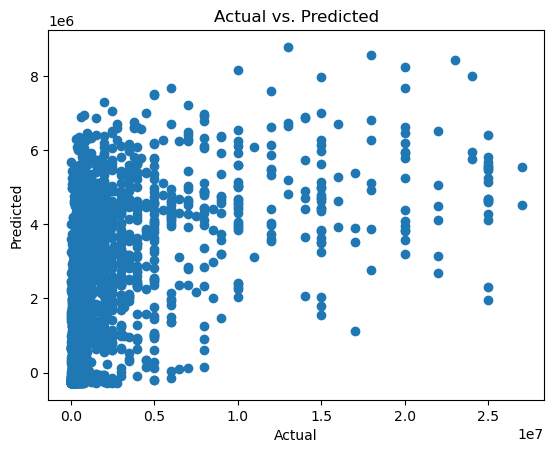

In [337]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()